In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from itertools import combinations
from tqdm.notebook import tqdm
from sklearn.manifold import TSNE

def getXY(csv, features=None, do_print=True):
    df = csv.copy()
    y_ori = np.array(df['type'])
    y_ori[y_ori == 0] = 0
    y_ori[y_ori == 2] = 1
    y_ori
    if(type(features) == type(None)):
        head = list(df.keys())
        head.remove('Unnamed: 0')
        head.remove('name')
        head.remove('score')
        head.remove('type')
        X_ori = np.array(df[head])
    else:
        X_ori = np.array(df[features])
    if(do_print):
        print(f"{X_ori.shape=} {y_ori.shape=}")
    return X_ori, y_ori

def train_model_SVM(X_ori,y_ori, do_print=True):
    X,y = X_ori.copy(), y_ori.copy()
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.utils import shuffle
    from sklearn.model_selection import cross_val_score

    X_shuff,y_shuff = shuffle(X,y)
    model = SVC(kernel='rbf')
    # model = LogisticRegression(random_state=0)
    cross = cross_val_score(model, X_shuff, y_shuff, cv=10)

    model = SVC(kernel='rbf')
    # model = LogisticRegression(random_state=0)
    model.fit(X_shuff, y_shuff)
    ans = model.predict(X_shuff)
    acc = sum(ans == y_shuff) / len(y_shuff)
    if(do_print):
        print(acc, cross.mean(), cross)
        return model
    else:
        return model, acc, cross

def train_model_LR(X_ori,y_ori, do_print=True):
    X,y = X_ori.copy(), y_ori.copy()
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.utils import shuffle
    from sklearn.model_selection import cross_val_score

    X_shuff,y_shuff = shuffle(X,y)
    # model = SVC(kernel='rbf')
    model = LogisticRegression(random_state=0)
    cross = cross_val_score(model, X_shuff, y_shuff, cv=10)

    # model = SVC(kernel='rbf')
    model = LogisticRegression(random_state=0)
    model.fit(X_shuff, y_shuff)
    ans = model.predict(X_shuff)
    acc = sum(ans == y_shuff) / len(y_shuff)
    if(do_print):
        print(acc, cross.mean(), cross)
        return model
    else:
        return model, acc, cross

In [2]:
csv = pd.read_csv('export/15s_133features_filter_std_ica.csv')
head = list(csv.columns)
head.remove('Unnamed: 0')
head.remove('name')
head.remove('score')
head.remove('type')
head = np.array(head)
X,y = getXY(csv.copy(), features=head)
model, acc, cross = train_model_LR(X,y,do_print=False)
print(acc, cross.mean(), cross.std())

weight = model.coef_.copy()
rank = (abs(weight) * -1).argsort()

X_ori.shape=(720, 133) y_ori.shape=(720,)
1.0 0.9805555555555557 0.01111111111111112


In [3]:
rank[:,:15][0]

array([ 96,  15, 100,  62,  52,  66,  13,  98,  29,  30,  94,  76, 102,
       105,  51])

========== 1 ==========
X_ori.shape=(720, 1) y_ori.shape=(720,)
SVM: 0.5555555555555556 0.5555555555555556 0.0
LR: 0.5555555555555556 0.5541666666666666 0.004166666666666686


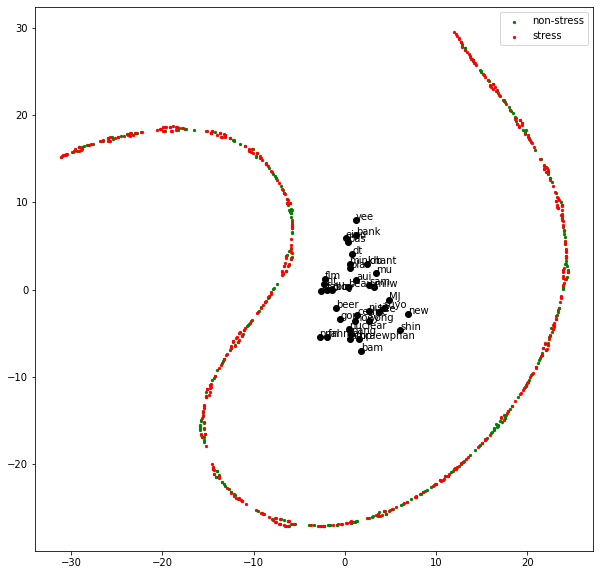

========== 2 ==========
X_ori.shape=(720, 2) y_ori.shape=(720,)
SVM: 0.5736111111111111 0.5472222222222223 0.05053723721850071
LR: 0.5555555555555556 0.5555555555555556 0.0


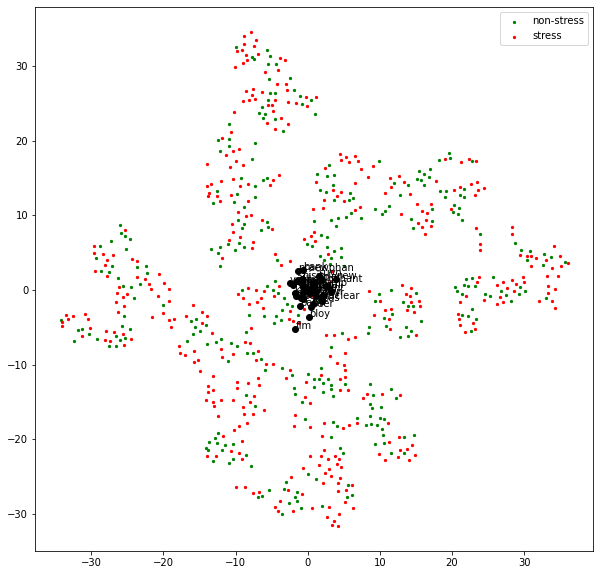

========== 3 ==========
X_ori.shape=(720, 3) y_ori.shape=(720,)
SVM: 0.6319444444444444 0.5736111111111111 0.04524027076361757
LR: 0.55 0.5305555555555556 0.03447131568330794


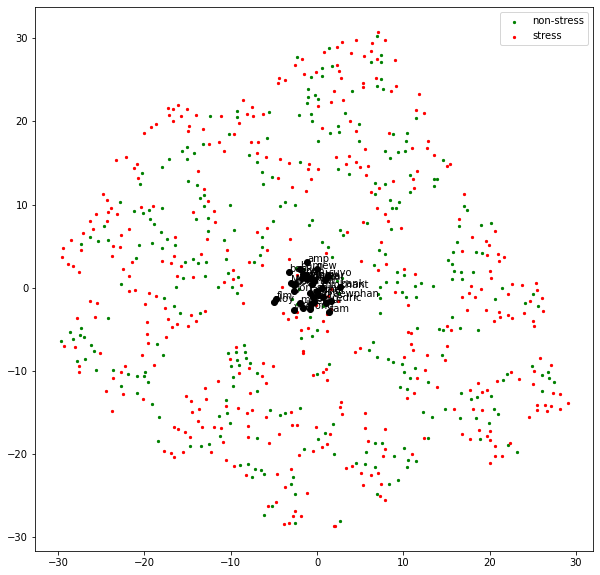

========== 4 ==========
X_ori.shape=(720, 4) y_ori.shape=(720,)
SVM: 0.6194444444444445 0.538888888888889 0.084208368840134
LR: 0.55 0.5333333333333333 0.030555555555555558


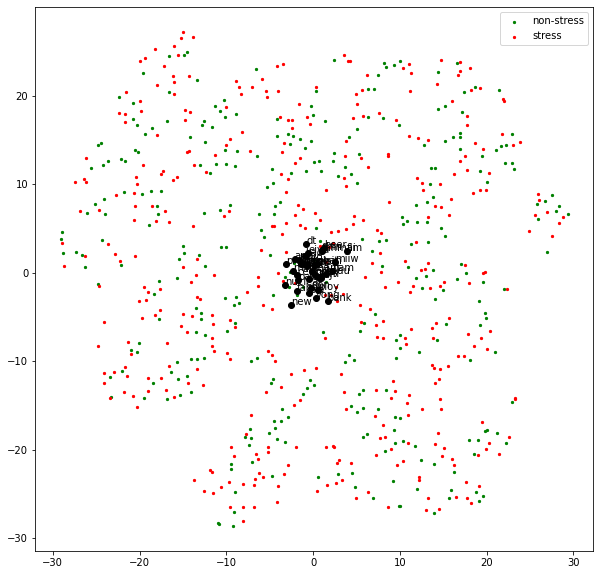

========== 5 ==========
X_ori.shape=(720, 5) y_ori.shape=(720,)
SVM: 0.6347222222222222 0.5666666666666667 0.04722222222222223
LR: 0.5513888888888889 0.5291666666666667 0.03254270698294441


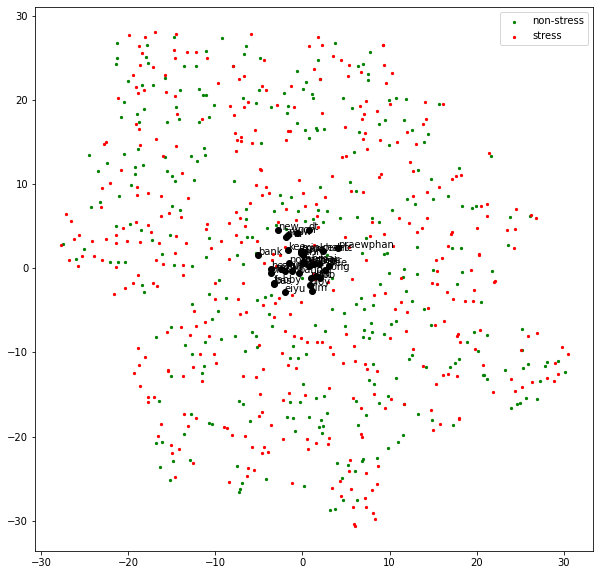

========== 6 ==========
X_ori.shape=(720, 6) y_ori.shape=(720,)
SVM: 0.6625 0.5527777777777778 0.07370277311900889
LR: 0.5527777777777778 0.5180555555555555 0.03404902964480907


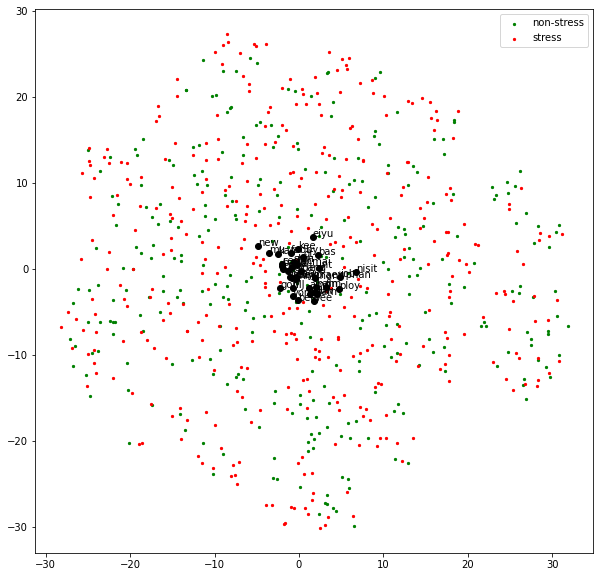

========== 7 ==========
X_ori.shape=(720, 7) y_ori.shape=(720,)
SVM: 0.6888888888888889 0.548611111111111 0.07788930496005529
LR: 0.5513888888888889 0.5055555555555556 0.027216552697590875


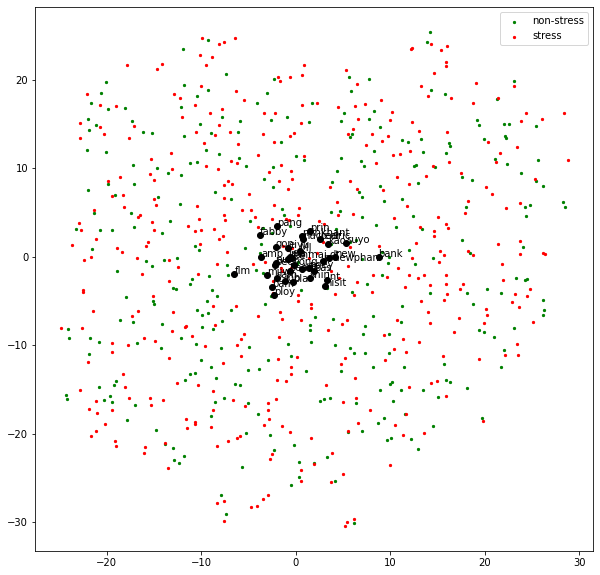

========== 8 ==========
X_ori.shape=(720, 8) y_ori.shape=(720,)
SVM: 0.7083333333333334 0.5291666666666666 0.05674082837726527
LR: 0.5527777777777778 0.5194444444444445 0.025


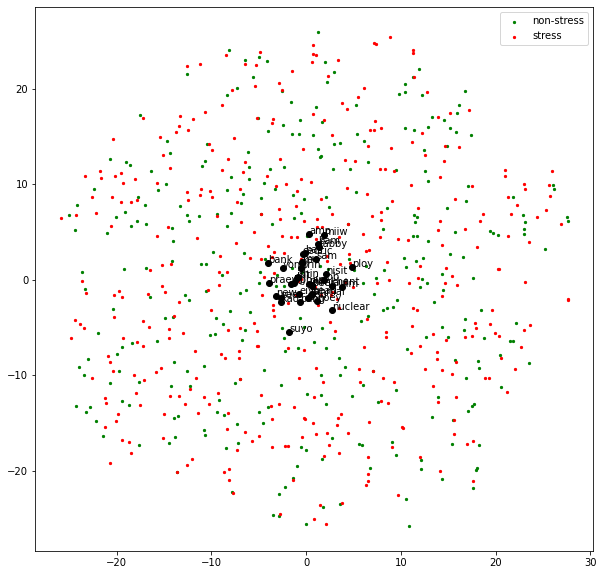

========== 9 ==========
X_ori.shape=(720, 9) y_ori.shape=(720,)
SVM: 0.7263888888888889 0.5250000000000001 0.05983516452371671
LR: 0.55 0.513888888888889 0.04347909956249592


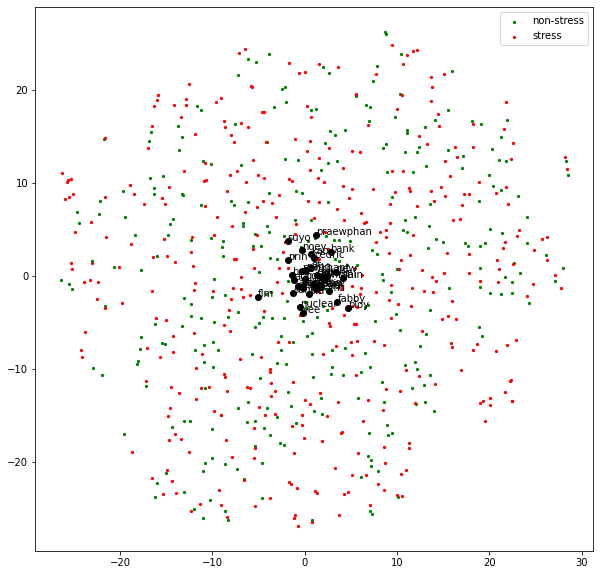

========== 10 ==========
X_ori.shape=(720, 10) y_ori.shape=(720,)
SVM: 0.7166666666666667 0.5305555555555556 0.03716413377849905
LR: 0.5555555555555556 0.5277777777777778 0.03167153958608717


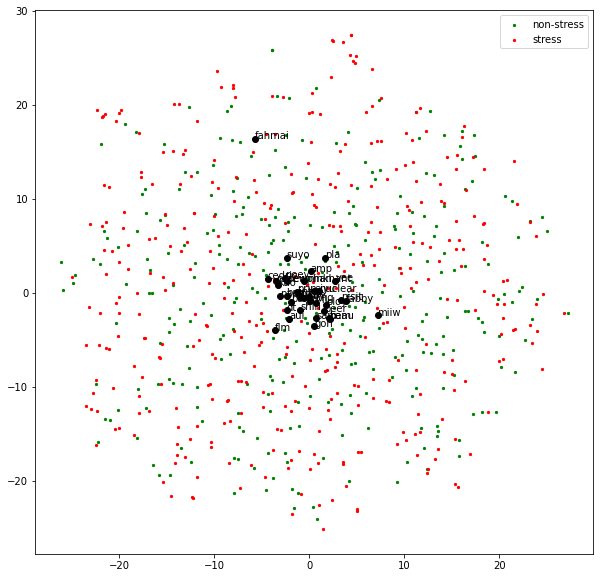

========== 11 ==========
X_ori.shape=(720, 11) y_ori.shape=(720,)
SVM: 0.7388888888888889 0.523611111111111 0.048132565142120706
LR: 0.5666666666666667 0.5125 0.039012699736633724


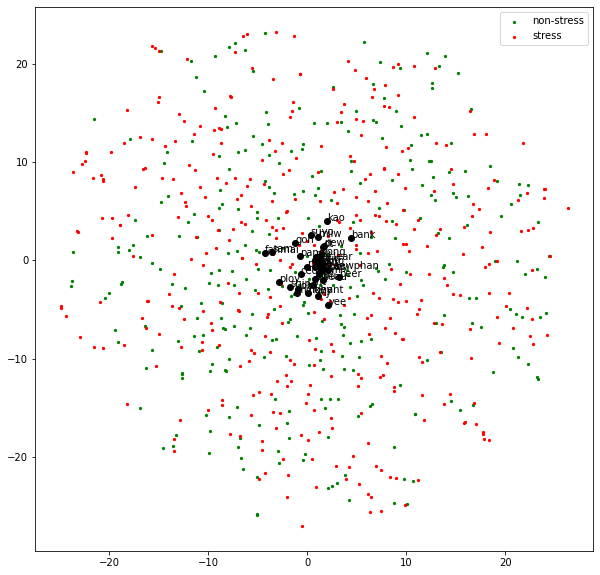

========== 12 ==========
X_ori.shape=(720, 12) y_ori.shape=(720,)
SVM: 0.7513888888888889 0.5347222222222222 0.043145068241691856
LR: 0.5625 0.5083333333333334 0.029265704869035382


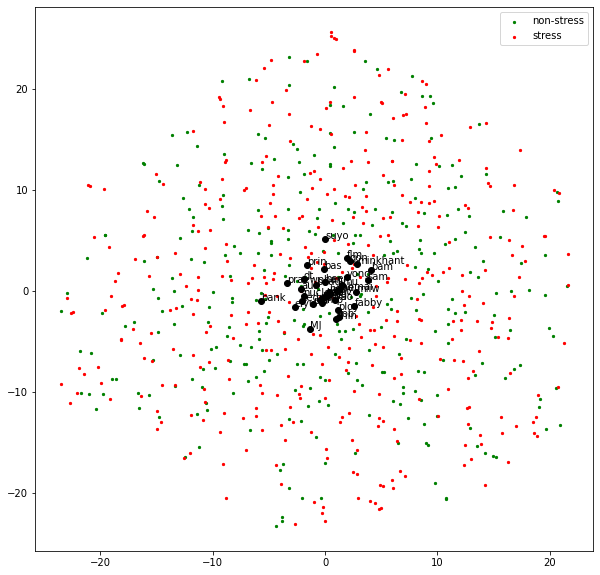

========== 13 ==========
X_ori.shape=(720, 13) y_ori.shape=(720,)
SVM: 0.7458333333333333 0.5180555555555555 0.03780738219115612
LR: 0.5541666666666667 0.5236111111111111 0.04168980838834345


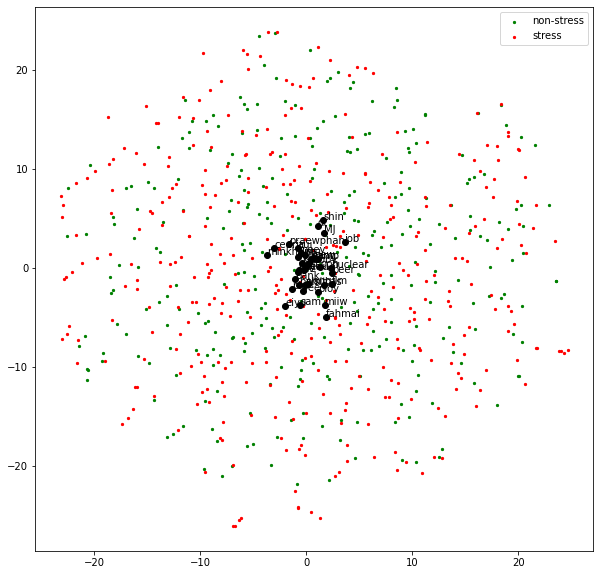

========== 14 ==========
X_ori.shape=(720, 14) y_ori.shape=(720,)
SVM: 0.7263888888888889 0.5555555555555556 0.03878955567713595
LR: 0.575 0.5555555555555556 0.029133579115837565


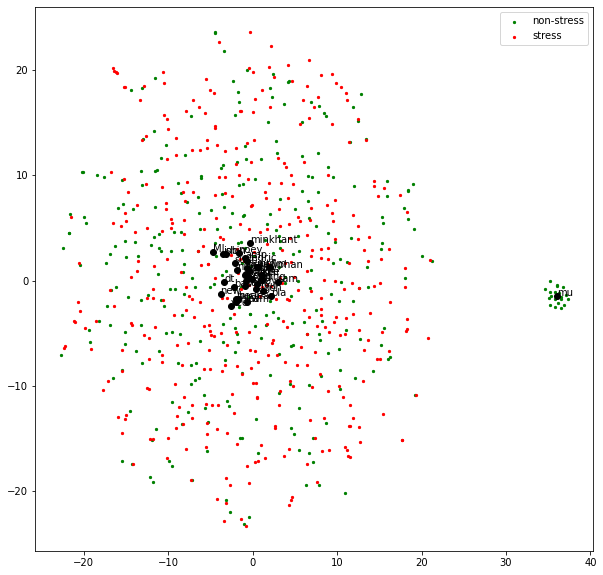

========== 15 ==========
X_ori.shape=(720, 15) y_ori.shape=(720,)
SVM: 0.7263888888888889 0.5625 0.0457490808111128
LR: 0.5833333333333334 0.5361111111111112 0.04530418452861137


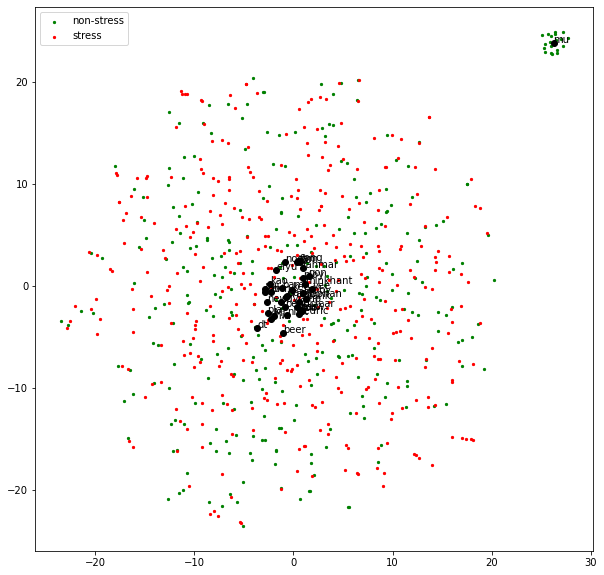

In [6]:
csv = pd.read_csv('export/15s_133features_filter_std_ica.csv')
head = list(csv.columns)
head.remove('Unnamed: 0')
head.remove('name')
head.remove('score')
head.remove('type')
head = np.array(head)

for i in range(1,15+1):
    print("="*10,i,"="*10)
    X,y = getXY(csv.copy(), features=head[:i])
    model, acc, cross = train_model_SVM(X,y,do_print=False)
    print("SVM:", acc, cross.mean(), cross.std())

    model, acc, cross = train_model_LR(X,y,do_print=False)
    print("LR:",acc, cross.mean(), cross.std())

    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)
    fig,ax = plt.subplots(figsize = (10,10))
    cdict = {0: 'green', 1: 'red'}
    ldict = {0: 'non-stress', 1: 'stress'}
    for g in np.unique(y):
        ix = np.where(y == g)
        ax.scatter(X_embedded[ix,0], X_embedded[ix,1], c =cdict[g], label = ldict[g], s = 5)

    for name in csv['name'].unique():
        point = X_embedded[csv['name'] == name].mean(axis=0)
        ax.scatter(point[0],point[1], c='black')
        ax.text(point[0],point[1], s=name)
    ax.legend()
    plt.show()
    

# Use LR RANK

========== 1 ==========
X_ori.shape=(720, 1) y_ori.shape=(720,)
SVM: 0.5833333333333334 0.5833333333333334 0.024845199749997656
LR: 0.5722222222222222 0.5708333333333333 0.022779471481745472


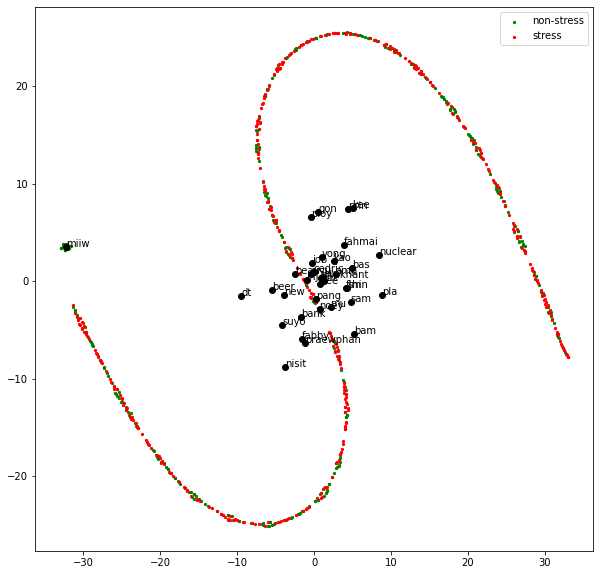

========== 2 ==========
X_ori.shape=(720, 2) y_ori.shape=(720,)
SVM: 0.6083333333333333 0.5944444444444443 0.0350264450358847
LR: 0.6194444444444445 0.6138888888888888 0.02222222222222221


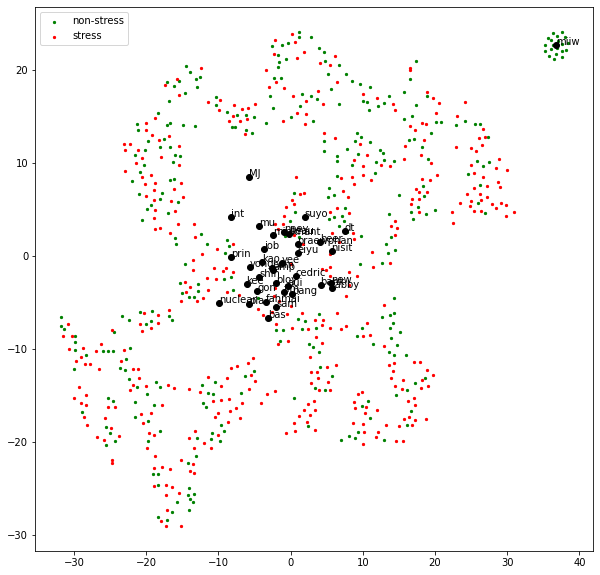

========== 3 ==========
X_ori.shape=(720, 3) y_ori.shape=(720,)
SVM: 0.6277777777777778 0.6194444444444445 0.040824829046386304
LR: 0.6208333333333333 0.6180555555555556 0.03940628044197529


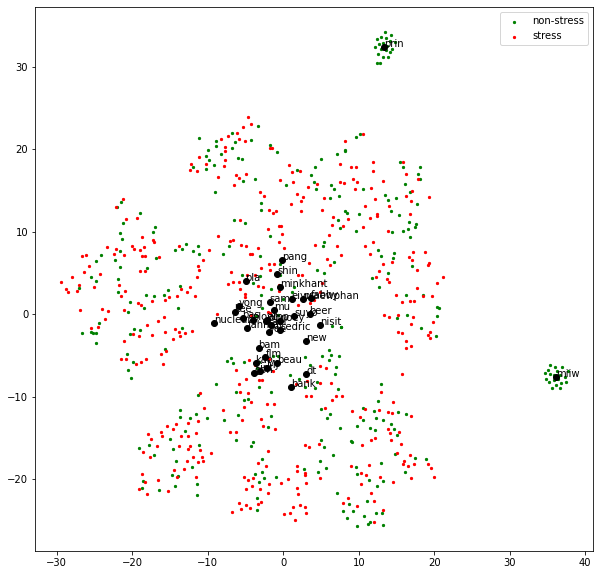

========== 4 ==========
X_ori.shape=(720, 4) y_ori.shape=(720,)
SVM: 0.6555555555555556 0.6430555555555555 0.03881441281245033
LR: 0.6611111111111111 0.6597222222222221 0.05564229340002815


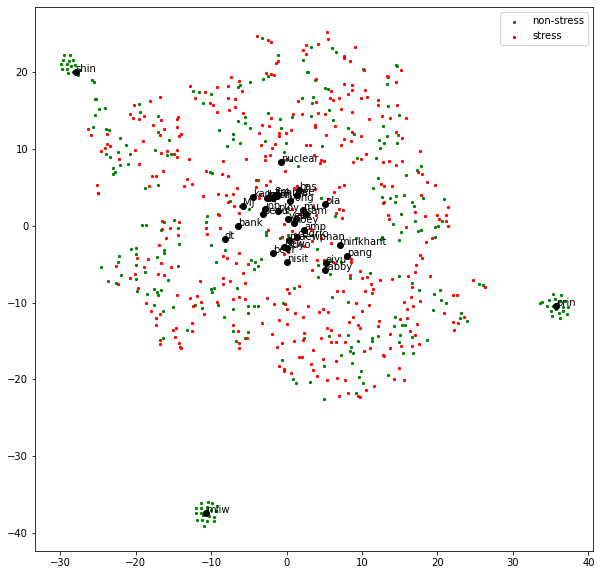

========== 5 ==========
X_ori.shape=(720, 5) y_ori.shape=(720,)
SVM: 0.6736111111111112 0.6652777777777777 0.02808853946688427
LR: 0.6833333333333333 0.6847222222222222 0.05795179456951407


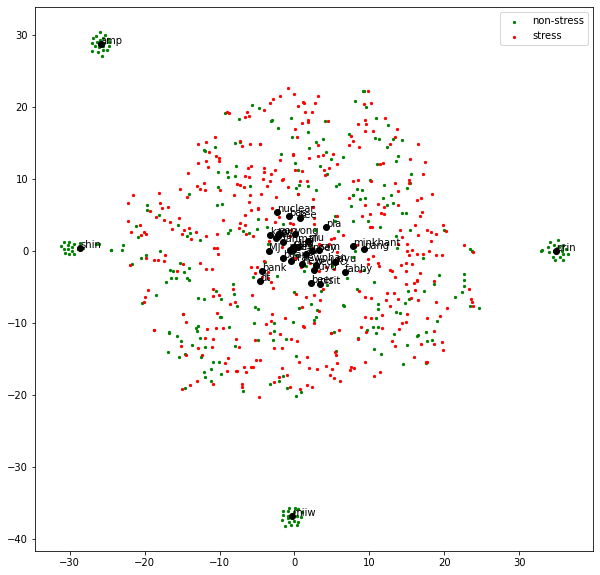

========== 6 ==========
X_ori.shape=(720, 6) y_ori.shape=(720,)
SVM: 0.7 0.6916666666666667 0.020412414523193156
LR: 0.7 0.6972222222222222 0.041573970964154904


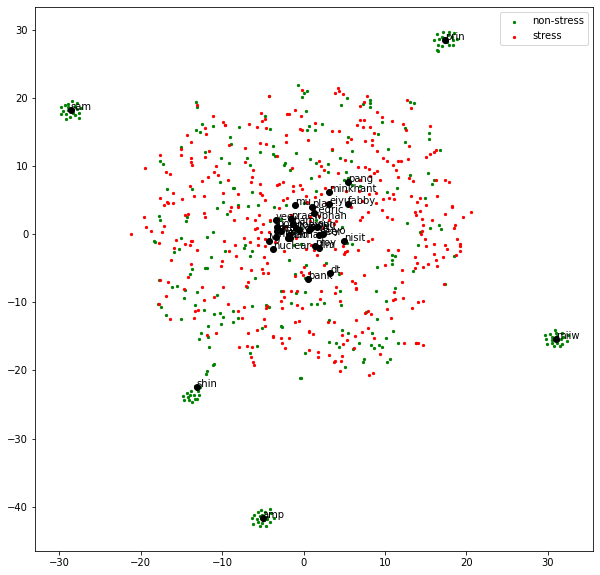

========== 7 ==========
X_ori.shape=(720, 7) y_ori.shape=(720,)
SVM: 0.725 0.7208333333333333 0.030078344205149606
LR: 0.7166666666666667 0.7138888888888888 0.06155144390600096


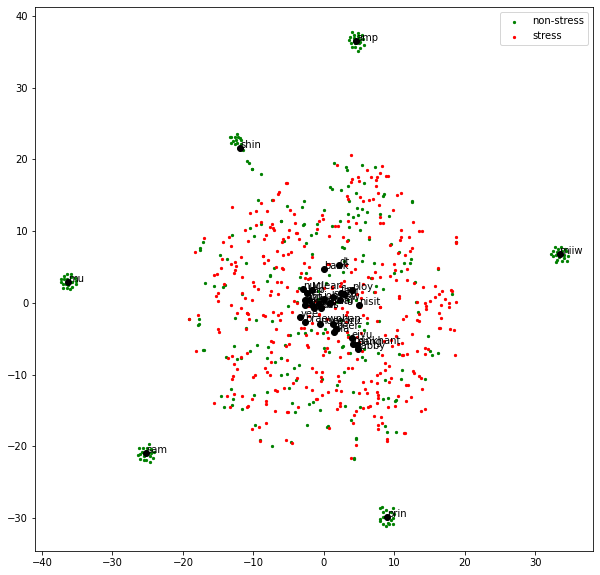

========== 8 ==========
X_ori.shape=(720, 8) y_ori.shape=(720,)
SVM: 0.7513888888888889 0.75 0.04303314829119352
LR: 0.7388888888888889 0.7375 0.05138888888888888


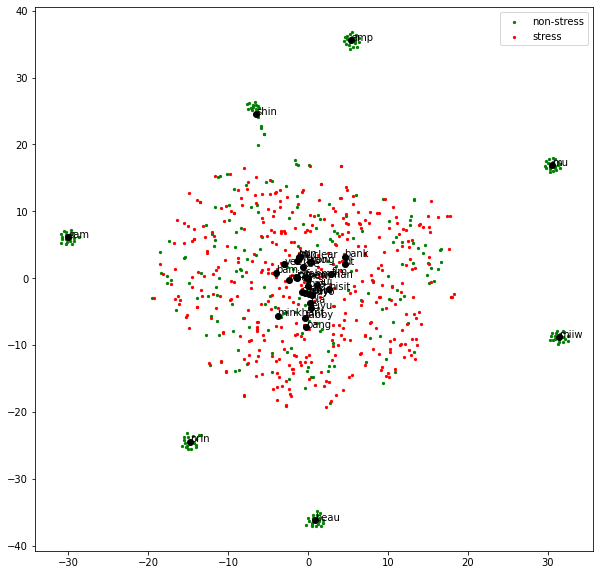

========== 9 ==========
X_ori.shape=(720, 9) y_ori.shape=(720,)
SVM: 0.7805555555555556 0.775 0.030301978096210304
LR: 0.7652777777777777 0.7652777777777777 0.053232688602046684


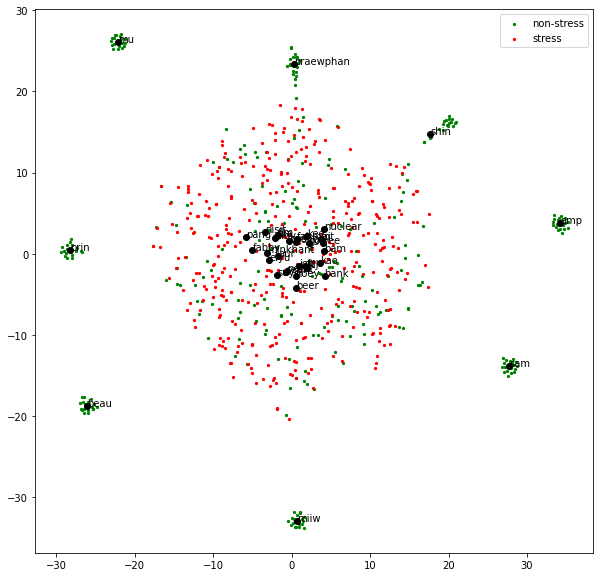

========== 10 ==========
X_ori.shape=(720, 10) y_ori.shape=(720,)
SVM: 0.8083333333333333 0.8083333333333332 0.025458753860865792
LR: 0.7944444444444444 0.7861111111111112 0.031180478223116162


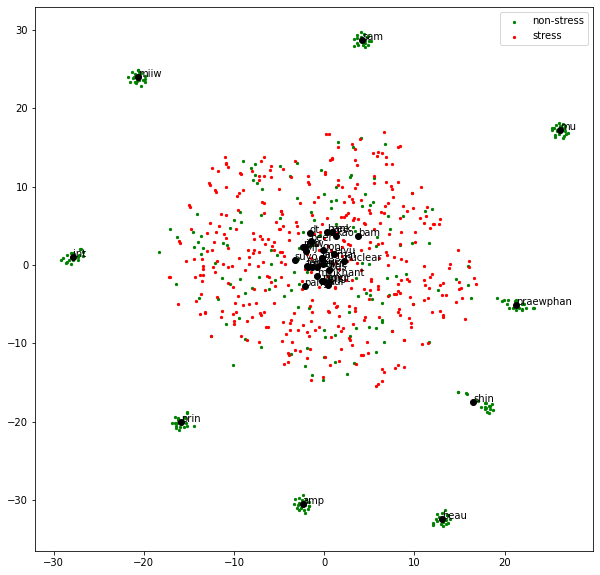

========== 11 ==========
X_ori.shape=(720, 11) y_ori.shape=(720,)
SVM: 0.8375 0.8305555555555555 0.041107357185968724
LR: 0.8152777777777778 0.8152777777777777 0.03170197836253703


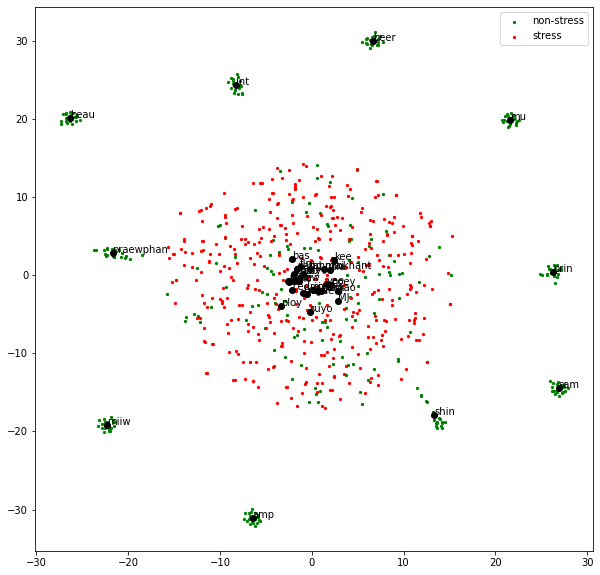

========== 12 ==========
X_ori.shape=(720, 12) y_ori.shape=(720,)
SVM: 0.8652777777777778 0.8597222222222222 0.02361111111111111
LR: 0.8458333333333333 0.836111111111111 0.020412414523193156


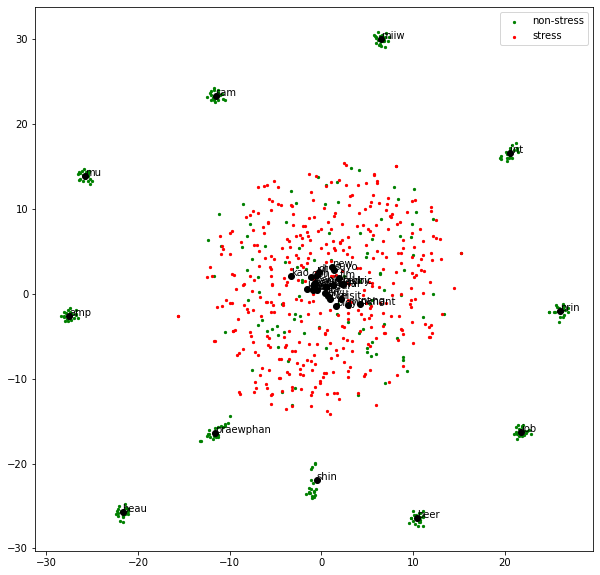

========== 13 ==========
X_ori.shape=(720, 13) y_ori.shape=(720,)
SVM: 0.8916666666666667 0.8875 0.018055555555555537
LR: 0.8652777777777778 0.8597222222222222 0.036456679856685235


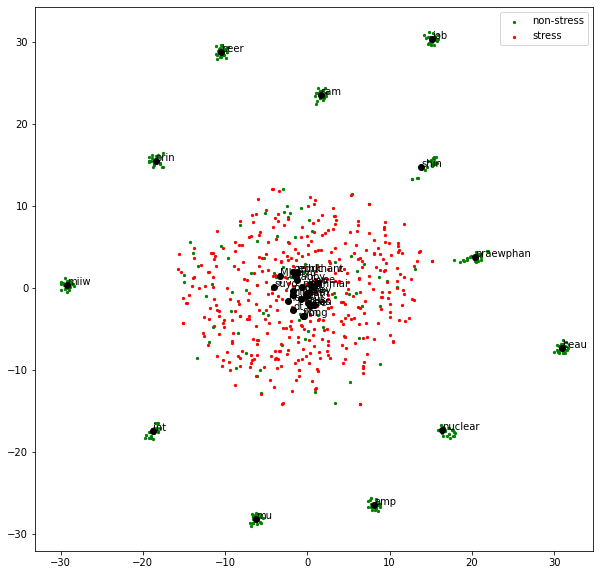

========== 14 ==========
X_ori.shape=(720, 14) y_ori.shape=(720,)
SVM: 0.9180555555555555 0.9097222222222221 0.035273403053334144
LR: 0.8819444444444444 0.8777777777777779 0.038188130791298666


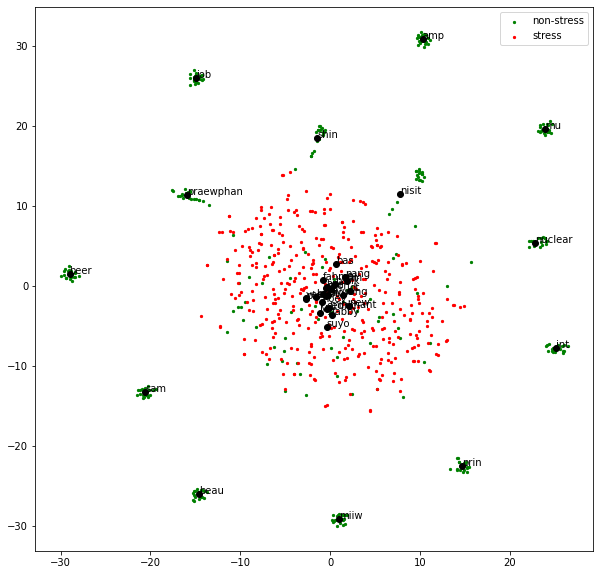

========== 15 ==========
X_ori.shape=(720, 15) y_ori.shape=(720,)
SVM: 0.9152777777777777 0.9097222222222223 0.026534684964642764
LR: 0.8833333333333333 0.8777777777777779 0.037164133778499024


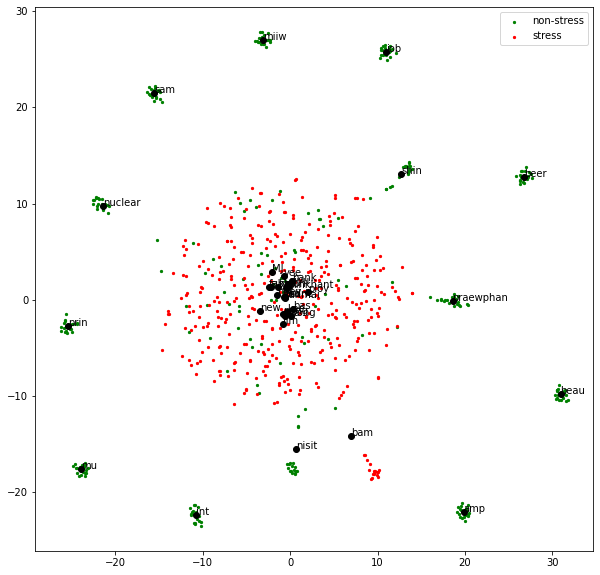

In [7]:
csv = pd.read_csv('export/15s_133features_filter_std_ica.csv')
head = list(csv.columns)
head.remove('Unnamed: 0')
head.remove('name')
head.remove('score')
head.remove('type')
head = np.array(head)
rank = [ 96,  15, 100,  62,  52,  66,  13,  98,  29,  30,  94,  76, 102, 105,  51]
for i in range(1,15+1):
    print("="*10,i,"="*10)
    X,y = getXY(csv.copy(), features=head[rank[:i]])
    model, acc, cross = train_model_SVM(X,y,do_print=False)
    print("SVM:", acc, cross.mean(), cross.std())

    model, acc, cross = train_model_LR(X,y,do_print=False)
    print("LR:",acc, cross.mean(), cross.std())

    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)
    fig,ax = plt.subplots(figsize = (10,10))
    cdict = {0: 'green', 1: 'red'}
    ldict = {0: 'non-stress', 1: 'stress'}
    for g in np.unique(y):
        ix = np.where(y == g)
        ax.scatter(X_embedded[ix,0], X_embedded[ix,1], c =cdict[g], label = ldict[g], s = 5)

    for name in csv['name'].unique():
        point = X_embedded[csv['name'] == name].mean(axis=0)
        ax.scatter(point[0],point[1], c='black')
        ax.text(point[0],point[1], s=name)
    ax.legend()
    plt.show()
    